# Vent gate analysis

2024_aug23

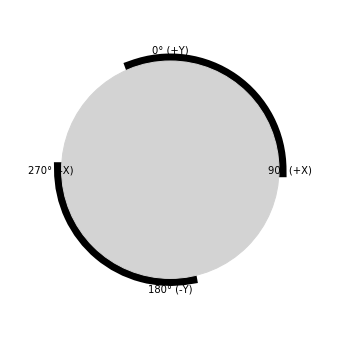

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(6, 6))

# Dibujar el círculo principal
circle = plt.Circle((0, 0), 1, color='lightgray', fill=True)
ax.add_artist(circle)

# Crear las franjas oscuras con líneas más gruesas
angles = [(180, 280), (0, 110)]

for start_angle, end_angle in angles:
    if start_angle > end_angle:
        # Dibujar el primer segmento
        theta1, theta2 = start_angle, 360
        ax.add_patch(Wedge((0, 0), 1, theta1=theta1, theta2=theta2, color='black', lw=15))
        
        # Dibujar el segundo segmento
        theta1, theta2 = 0, end_angle
        ax.add_patch(Wedge((0, 0), 1, theta1=theta1, theta2=theta2, color='black', lw=15))
    else:
        # Dibujar el segmento cuando no cruza el 0
        ax.add_patch(Wedge((0, 0), 1, theta1=start_angle, theta2=end_angle, color='black', lw=15))

# Configurar el eje con coordenadas claras
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal', 'box')
ax.axis('off')

# Agregar etiquetas para mayor claridad en las coordenadas
ax.text(0, 1.1, '0° (+Y)', ha='center', va='center')
ax.text(1.1, 0, '90° (+X)', ha='center', va='center')
ax.text(0, -1.1, '180° (-Y)', ha='center', va='center')
ax.text(-1.1, 0, '270° (-X)', ha='center', va='center')

# Mostrar el gráfico
plt.show()

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

La tabla mcs_az_el.csv contiene telescope az,el,eastVentgate,westVentgate,p2_seeing, windSpeed, windDir, 

In [72]:
df_p2= pd.read_csv('mcs_az_el.csv')

In [20]:
df_p2.head()

,Unnamed: 0,date,hour,datetime,ecs_az_pos,topshut_pos,botshut_pos,eastVent_pos,westVent_pos,pwfs2_see,windSp,windDir,dateB,HourB,datetimeB,mcs_el_pos
0,0,1/1/22,0:58:54,44562.04091,172.0,103.7,9.6,30.0,30.0,1.92,3.0,141.5,1/1/22,0:58:59,44562.04097,75.89
1,1,1/1/22,1:06:26,44562.04614,175.7,103.7,9.6,30.0,30.0,0.79,1.4,142.5,1/1/22,1:05:59,44562.04583,76.04
2,2,1/1/22,1:07:15,44562.04671,175.7,103.7,9.6,30.0,30.0,0.86,1.4,141.5,1/1/22,1:07:00,44562.04653,76.05
3,3,1/1/22,1:08:05,44562.04729,175.7,103.7,9.6,30.0,30.0,0.96,1.4,144.0,1/1/22,1:07:59,44562.04722,76.06
4,4,1/1/22,1:08:55,44562.04787,175.7,103.7,9.6,30.0,30.0,0.86,1.4,138.0,1/1/22,1:09:00,44562.04792,76.07


In [21]:
df_p2.describe()

,Unnamed: 0,datetime,ecs_az_pos,topshut_pos,botshut_pos,eastVent_pos,westVent_pos,pwfs2_see,windSp,windDir,datetimeB,mcs_el_pos
count,35152.000000,35152.000000,35152.000000,35152.000000,35152.000000,35152.000000,35152.000000,35152.000000,35152.000000,35152.000000,35152.000000,35152.000000
mean,17575.500000,44682.781550,170.383147,90.621067,21.204353,36.104418,40.300609,0.879263,6.030445,270.296566,44682.771206,59.906250
std,10147.652668,51.262260,90.991791,20.118471,15.948523,32.384994,32.426232,0.373989,4.170896,72.639026,51.273481,13.583851
min,0.000000,44562.040910,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,-0.100000,44562.040970,27.620000
25%,8787.750000,44645.161173,93.950000,83.300000,10.300000,10.000000,10.000000,0.600000,2.700000,283.000000,44645.161110,47.270000
50%,17575.500000,44688.049355,167.750000,102.900000,16.000000,25.000000,30.000000,0.800000,5.600000,300.000000,44688.049350,57.990000
75%,26363.250000,44723.105325,240.000000,103.600000,29.100000,60.000000,60.000000,1.100000,8.500000,308.000000,44723.105403,68.950000
max,35151.000000,44772.223220,359.000000,104.000000,60.000000,100.000000,100.000000,2.000000,39.200000,356.000000,44772.223110,90.050000


## Plotting histogram

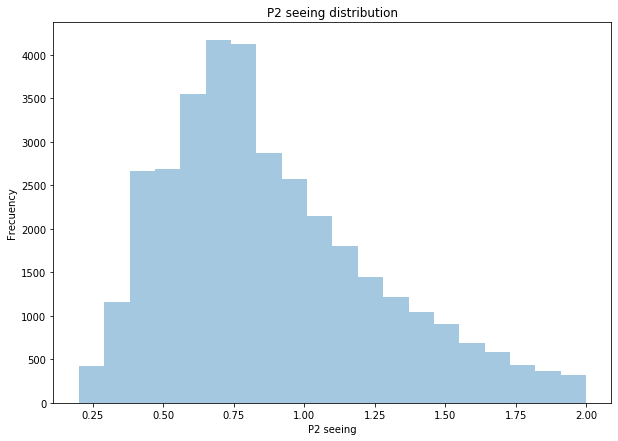

In [22]:
plt.figure(figsize=(10, 7))  # Ancho=10 pulgadas, Altura=7 pulgadas
sns.distplot(df_p2['pwfs2_see'], kde=False, bins=20)
plt.title('P2 seeing distribution')
plt.xlabel('P2 seeing')
plt.ylabel('Frecuency')
plt.show()

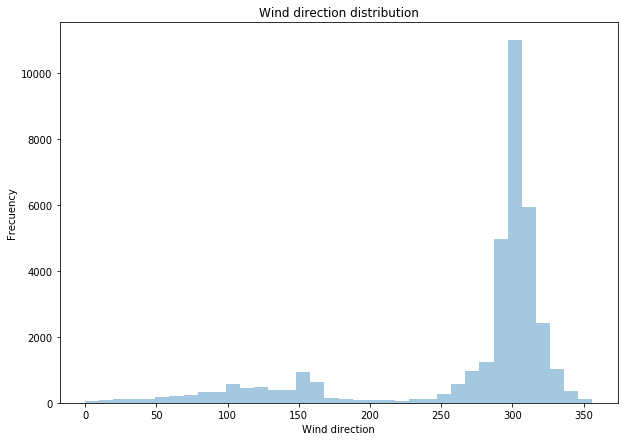

In [60]:
plt.figure(figsize=(10, 7))  # Ancho=10 pulgadas, Altura=7 pulgadas
sns.distplot(df_p2['windDir'], kde=False, bins=36)
plt.title('Wind direction distribution')
plt.xlabel('Wind direction')
plt.ylabel('Frecuency')
plt.show()

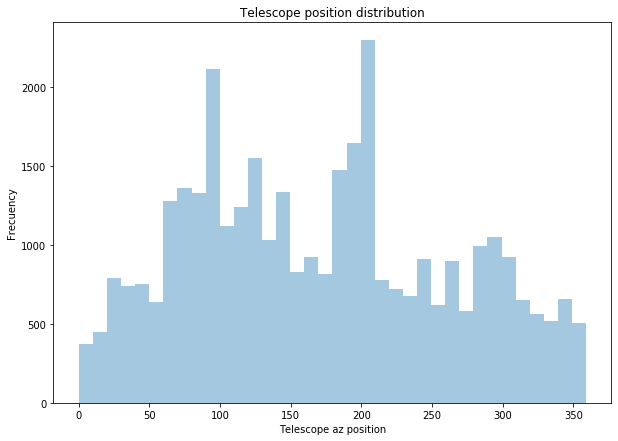

In [73]:
plt.figure(figsize=(10, 7))  # Ancho=10 pulgadas, Altura=7 pulgadas
sns.distplot(df_p2['ecs_az_pos'], bins=36, kde= False)
plt.title('Telescope position distribution')
plt.xlabel('Telescope az position')
plt.ylabel('Frecuency')
plt.show()

In [11]:
#bins = [0, 9.99, 19.99, 29.99, 39.99, 49.99, 59.99, 69.99, 79.99, 89.99, 100]
bins = [0,4.99,9.99,14.99,19.99,

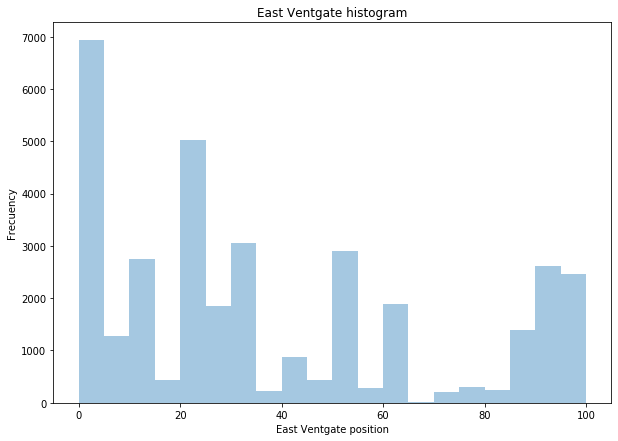

In [14]:
plt.figure(figsize=(10, 7))  # Ancho=10 pulgadas, Altura=7 pulgadas
sns.distplot(df_p2['eastVent_pos'], bins=20, kde=False)
plt.title('East Ventgate histogram')
plt.xlabel('East Ventgate position')
plt.ylabel('Frecuency')
plt.show()

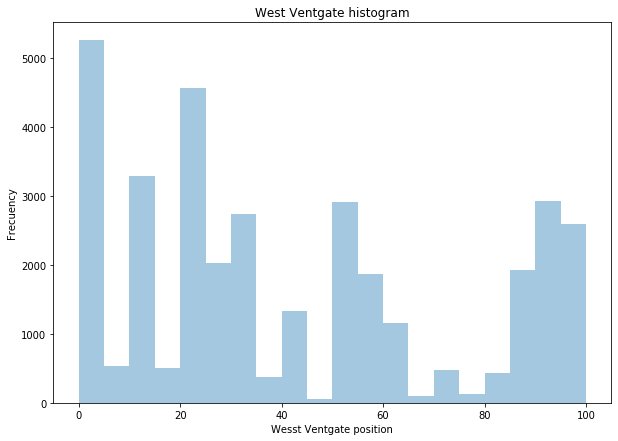

In [15]:
plt.figure(figsize=(10, 7))  # Ancho=10 pulgadas, Altura=7 pulgadas
sns.distplot(df_p2['westVent_pos'], bins=20, kde=False)
plt.title('West Ventgate histogram')
plt.xlabel('Wesst Ventgate position')
plt.ylabel('Frecuency')
plt.show()

In [26]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('mcs_az_el.csv')

# Filtrar las filas donde windSp es igual a cero o mayor a 20
df_filtrado = df[(df['windSp'] != 0) & (df['windSp'] <= 20) ]

# Verificar si el DataFrame filtrado no está vacío
if not df_filtrado.empty:
    # Eliminar las filas usando drop
    df = df.drop(df.index.difference(df_filtrado.index))

    # Mostrar el DataFrame filtrado para verificar
    print('df no esta vacio, ver tabla_wind20_filtrado.csv')
else:
    print("No se encontraron filas para filtrar o eliminar.")

# Guardar el DataFrame filtrado en un nuevo archivo CSV (opcional)
df.to_csv('mcs_az_el_wind20.csv', index=False)

df no esta vacio, ver tabla_wind20_filtrado.csv


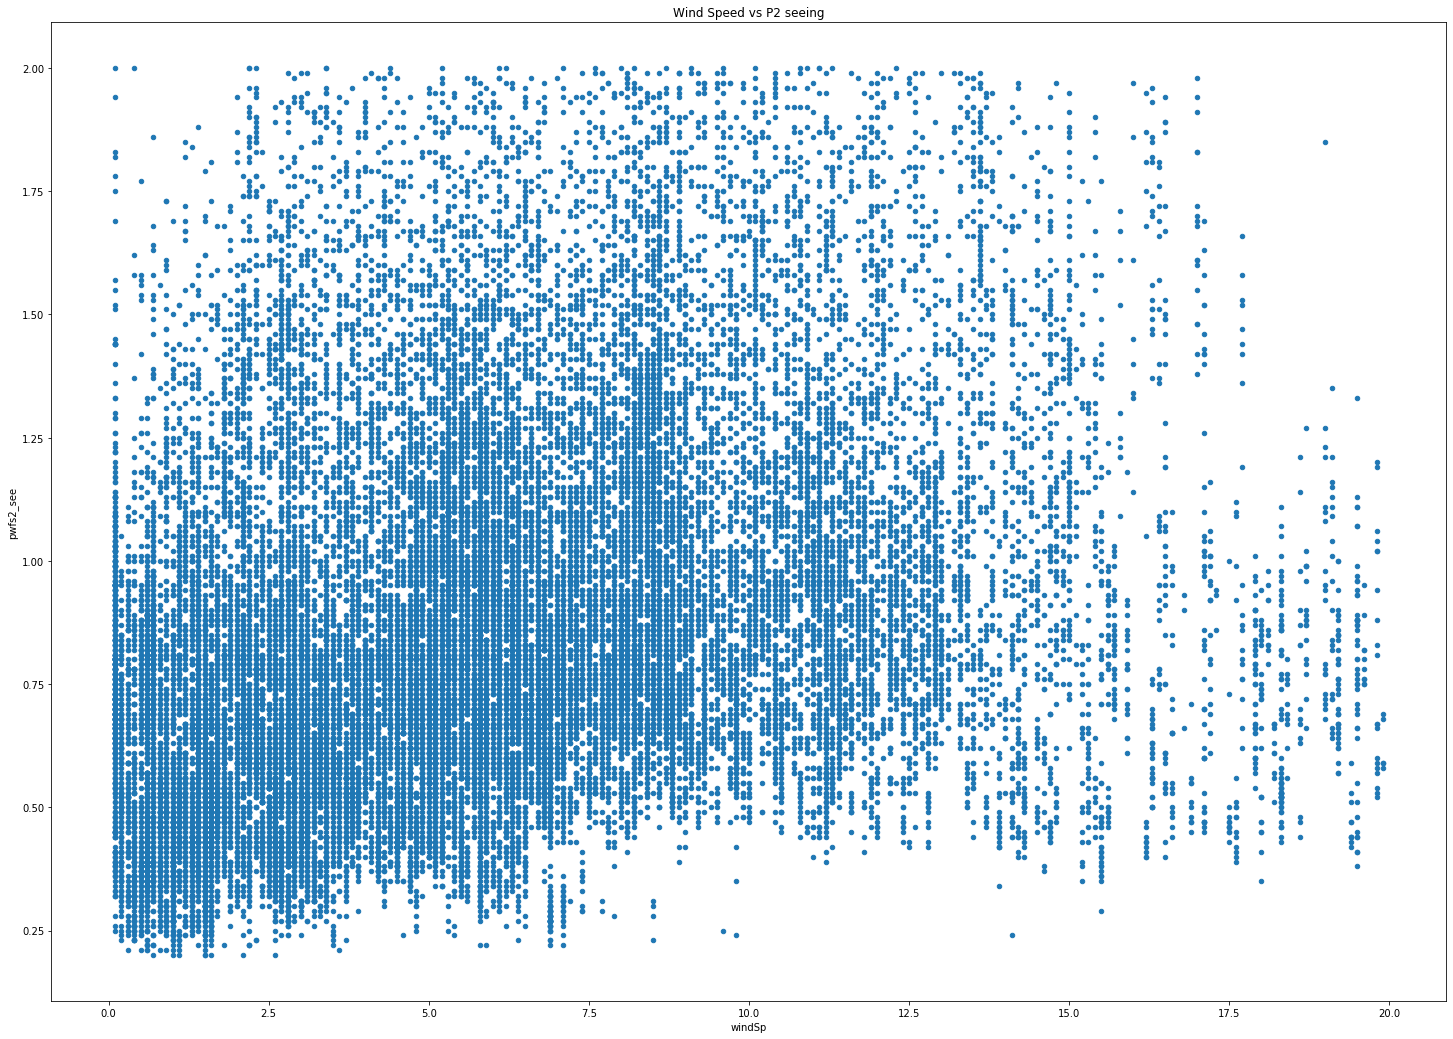

In [27]:
df.plot.scatter(x='windSp', y='pwfs2_see', title='Wind Speed vs P2 seeing', figsize=(25, 18) )

In [24]:
import statsmodels.api as sm

definir variables dependientes (y), y variables independientes (x)

In [28]:
df20 = pd.read_csv('mcs_az_el_wind20.csv')

In [37]:
df20.head()

,Unnamed: 0,date,hour,datetime,ecs_az_pos,topshut_pos,botshut_pos,eastVent_pos,westVent_pos,pwfs2_see,windSp,windDir,dateB,HourB,datetimeB,mcs_el_pos
0,0,1/1/22,0:58:54,44562.04091,172.0,103.7,9.6,30.0,30.0,1.92,3.0,141.5,1/1/22,0:58:59,44562.04097,75.89
1,1,1/1/22,1:06:26,44562.04614,175.7,103.7,9.6,30.0,30.0,0.79,1.4,142.5,1/1/22,1:05:59,44562.04583,76.04
2,2,1/1/22,1:07:15,44562.04671,175.7,103.7,9.6,30.0,30.0,0.86,1.4,141.5,1/1/22,1:07:00,44562.04653,76.05
3,3,1/1/22,1:08:05,44562.04729,175.7,103.7,9.6,30.0,30.0,0.96,1.4,144.0,1/1/22,1:07:59,44562.04722,76.06
4,4,1/1/22,1:08:55,44562.04787,175.7,103.7,9.6,30.0,30.0,0.86,1.4,138.0,1/1/22,1:09:00,44562.04792,76.07


In [29]:
y=df20['pwfs2_see']
x=df20['windSp']

Agregar constante y ajustar modelo

In [30]:
x=sm.add_constant(x)
lm=sm.OLS(y,x).fit()

/Users/pcandia/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [31]:
lm.predict(x)

0        0.786849
1        0.743231
2        0.743231
3        0.743231
4        0.743231
           ...   
34506    1.152151
34507    1.152151
34508    1.152151
34509    1.152151
34510    1.029475
Length: 34511, dtype: float64

La tabla de regresion

In [32]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pwfs2_see   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     3384.
Date:                Thu, 29 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:59:42   Log-Likelihood:                -13111.
No. Observations:               34511   AIC:                         2.623e+04
Df Residuals:                   34509   BIC:                         2.624e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7051      0.003    205.192      0.000       0.698       0.712
windSp         0.0273      0.000     58.171      0.000       0.026       0.028
==============================================================================
Omnibus:                     3093.321   Durbin-Watson:                   0.303
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3987.340
Skew:                           0.820   Prob(JB):                         0.00
Kurtosis:                       3.287   Cond. No.                         13.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

linear regression equation


In [35]:
#Coeficiente WindSpeed_mean: 0.0752
#Coeficiente Constante: 0.0242
#y=ax+b
y_pred= 0.0273*x['windSp']+0.7051

Plotting line

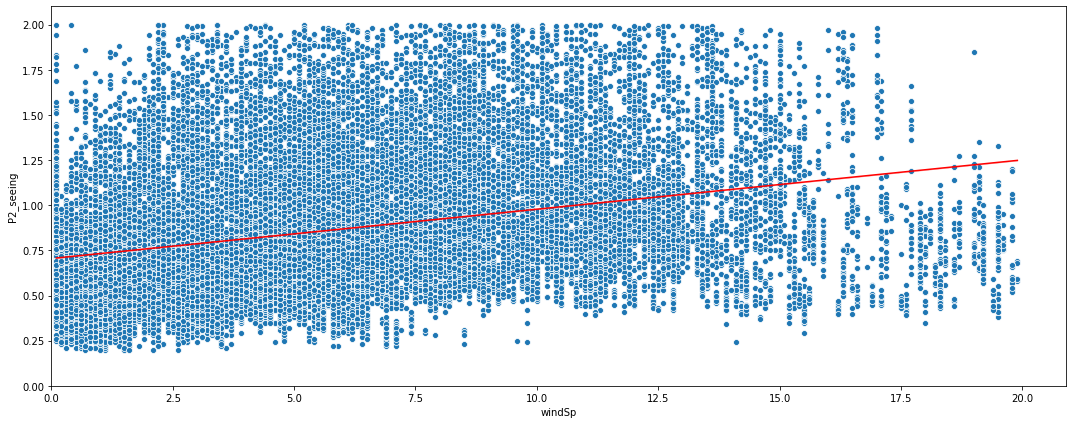

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
#graficar los puntos
plt.figure(figsize=(15,6), tight_layout=True)
sns.scatterplot(x=x['windSp'],y=y)
#Graficar linea
sns.lineplot(x=x['windSp'],y=y_pred, color='red')
plt.ylabel('P2_seeing')
plt.xlim(0)
plt.ylim(0)
plt.show()

## Wind speed vs P2 mean analysis

In [ ]:
import pandas as pd
import numpy as np

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20.csv'  # Reemplaza con la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Calcular el ángulo cenital z = 90 - mcs_el_pos
df['zenith_angle'] = 90 - df['mcs_el_pos']

# Calcular la masa de aire AM = 1 / cos(z)
df['AM'] = 1 / np.cos(np.radians(df['zenith_angle']))

# Guardar el resultado en un nuevo archivo CSV (opcional)
output_file = 'p2mean_az_el_wind20_with_AM.csv'
df.to_csv(output_file, index=False)

# Mostrar las primeras filas del DataFrame para verificar
#print(df[['mcs_el_pos', 'zenith_angle', 'AM']].head())

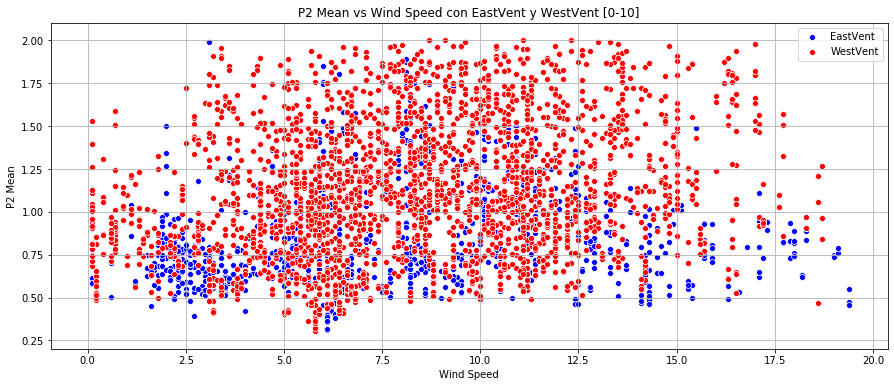

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent' y 'westVent'
filtered_df_east = df[(df['eastVent'] >= 0) & (df['eastVent'] <= 10)]
filtered_df_west = df[(df['westVent'] >= 0) & (df['westVent'] <= 10)]

# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_west, color='red', label='WestVent')

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean')
plt.title('P2 Mean vs Wind Speed con EastVent y WestVent [0-10]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

### Wind Direction [280-320] , Telescope Position in Azimuth [80-160], Elevation [70-90]

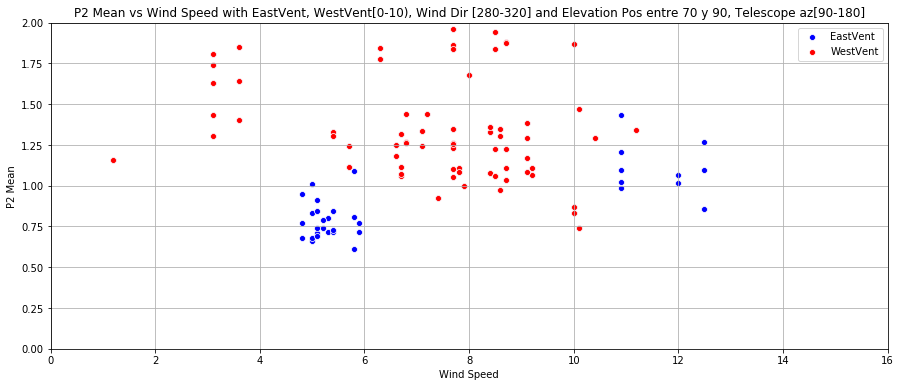

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 0) & (df['eastVent'] < 10) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]

filtered_df_west = df[(df['westVent'] >= 0) & (df['westVent'] < 10) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean')
plt.title('P2 Mean vs Wind Speed with EastVent, WestVent[0-10), Wind Dir [280-320] and Elevation Pos entre 70 y 90, Telescope az[80-160]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

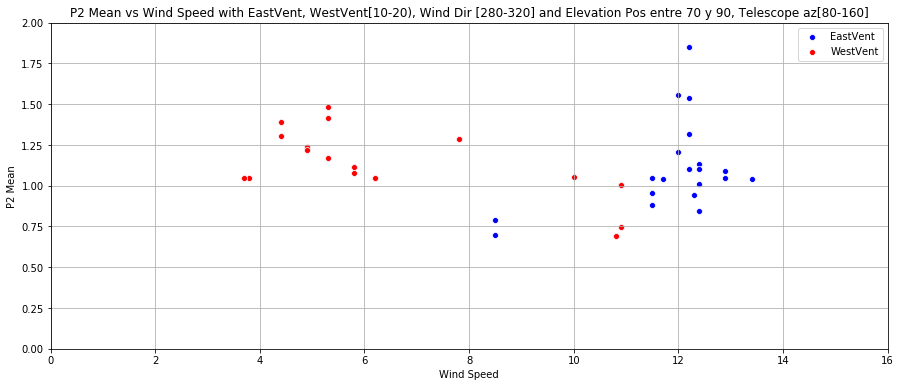

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 10) & (df['eastVent'] < 20) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]

filtered_df_west = df[(df['westVent'] >= 10) & (df['westVent'] < 20) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean')
plt.title('P2 Mean vs Wind Speed with EastVent, WestVent[10-20), Wind Dir [280-320] and Elevation Pos entre 70 y 90, Telescope az[80-160]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

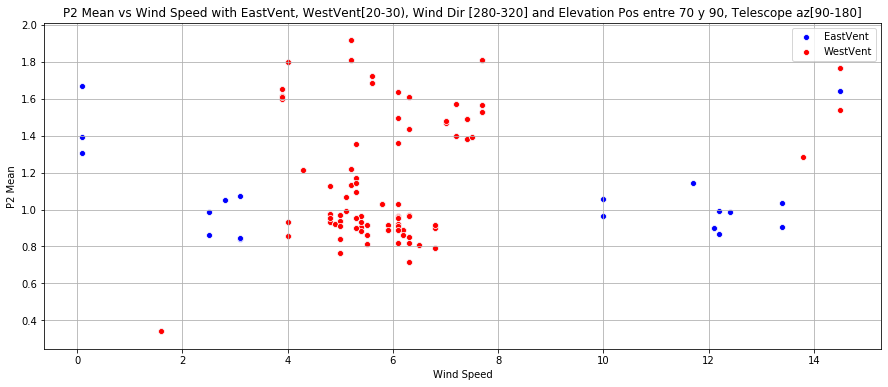

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 20) & (df['eastVent'] < 30) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=90) & (df['ecs_az'] <=180)]

filtered_df_west = df[(df['westVent'] >= 20) & (df['westVent'] < 30) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=90) & (df['ecs_az'] <=180)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_west, color='red', label='WestVent')

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean')
plt.title('P2 Mean vs Wind Speed with EastVent, WestVent[20-30), Wind Dir [280-320] and Elevation Pos entre 70 y 90, Telescope az[90-180]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

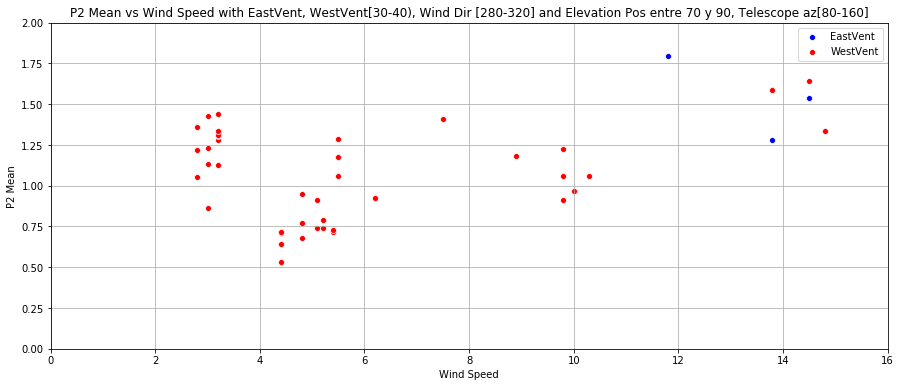

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 30) & (df['eastVent'] < 40) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]

filtered_df_west = df[(df['westVent'] >= 30) & (df['westVent'] < 40) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean')
plt.title('P2 Mean vs Wind Speed with EastVent, WestVent[30-40), Wind Dir [280-320] and Elevation Pos entre 70 y 90, Telescope az[80-160]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

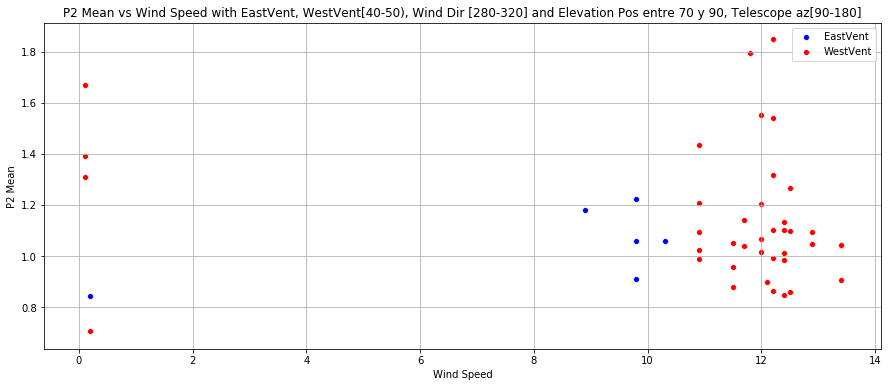

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 40) & (df['eastVent'] < 50) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=90) & (df['ecs_az'] <=180)]

filtered_df_west = df[(df['westVent'] >= 40) & (df['westVent'] < 50) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=90) & (df['ecs_az'] <=180)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_west, color='red', label='WestVent')

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean')
plt.title('P2 Mean vs Wind Speed with EastVent, WestVent[40-50), Wind Dir [280-320] and Elevation Pos entre 70 y 90, Telescope az[90-180]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

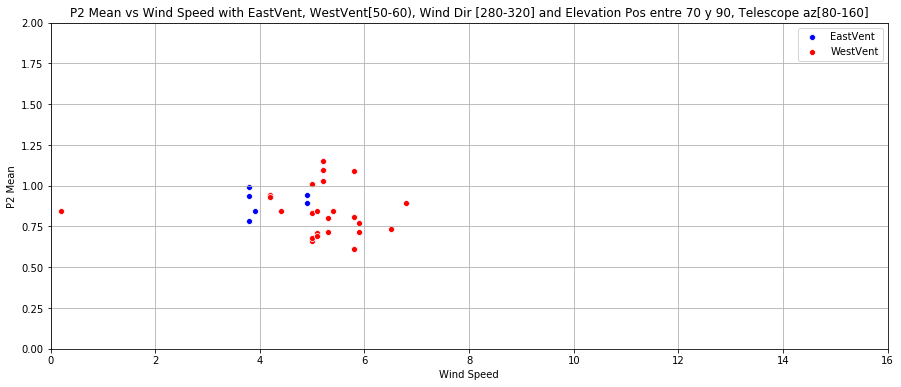

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 50) & (df['eastVent'] < 60) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]

filtered_df_west = df[(df['westVent'] >= 50) & (df['westVent'] < 60) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean')
plt.title('P2 Mean vs Wind Speed with EastVent, WestVent[50-60), Wind Dir [280-320] and Elevation Pos entre 70 y 90, Telescope az[80-160]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

No handles with labels found to put in legend.


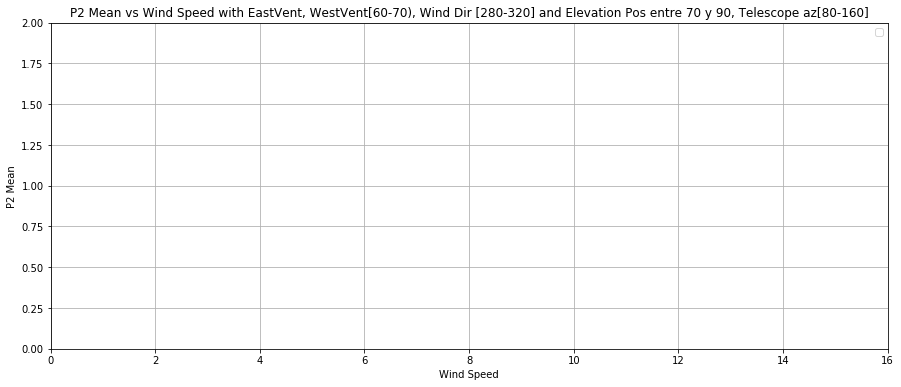

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 60) & (df['eastVent'] < 70) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]

filtered_df_west = df[(df['westVent'] >= 60) & (df['westVent'] < 70) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean')
plt.title('P2 Mean vs Wind Speed with EastVent, WestVent[60-70), Wind Dir [280-320] and Elevation Pos entre 70 y 90, Telescope az[80-160]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

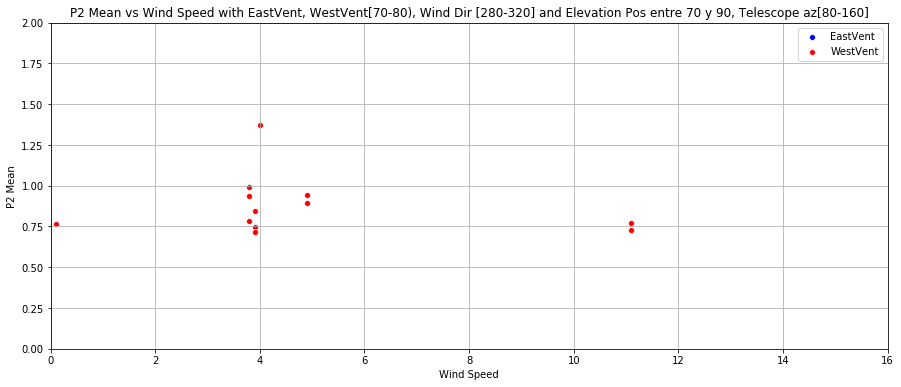

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 70) & (df['eastVent'] < 80) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]

filtered_df_west = df[(df['westVent'] >= 70) & (df['westVent'] < 80) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=90) & (df['ecs_az'] <=180)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean')
plt.title('P2 Mean vs Wind Speed with EastVent, WestVent[70-80), Wind Dir [280-320] and Elevation Pos entre 70 y 90, Telescope az[80-160]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

No handles with labels found to put in legend.


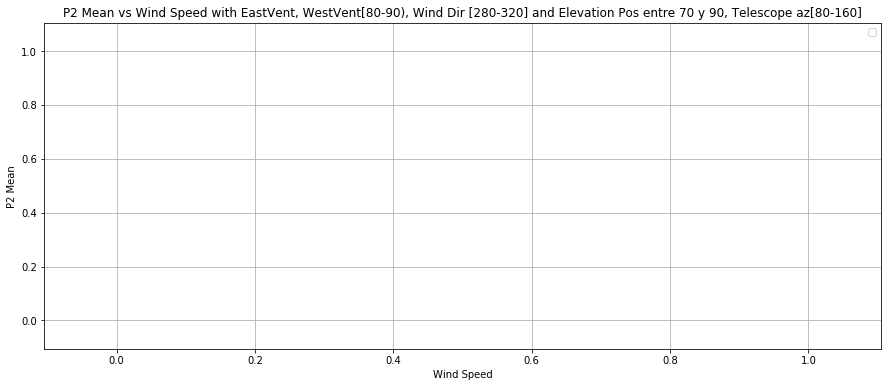

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 80) & (df['eastVent'] < 90) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]

filtered_df_west = df[(df['westVent'] >= 80) & (df['westVent'] < 90) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_west, color='red', label='WestVent')

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean')
plt.title('P2 Mean vs Wind Speed with EastVent, WestVent[80-90), Wind Dir [280-320] and Elevation Pos entre 70 y 90, Telescope az[80-160]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

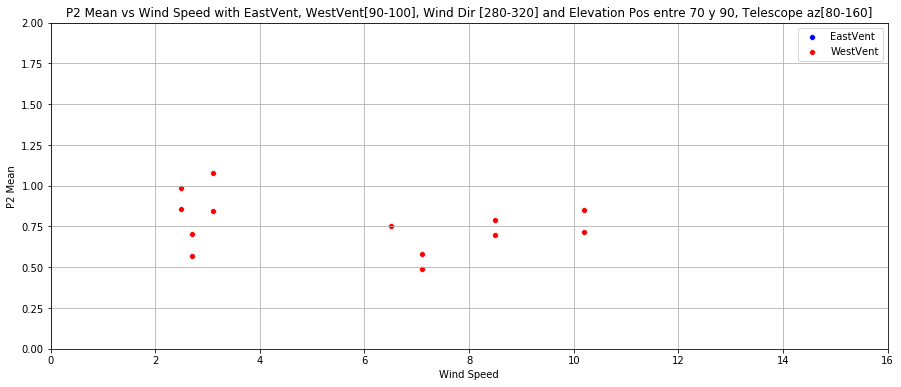

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 90) & (df['eastVent'] <= 100) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]

filtered_df_west = df[(df['westVent'] >= 90) & (df['westVent'] <= 100) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=80) & (df['ecs_az'] <=160)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean')
plt.title('P2 Mean vs Wind Speed with EastVent, WestVent[90-100], Wind Dir [280-320] and Elevation Pos entre 70 y 90, Telescope az[80-160]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

## Wind Direction [280-320] , Telescope Position in Azimuth [260-340], Elevation [70-90]

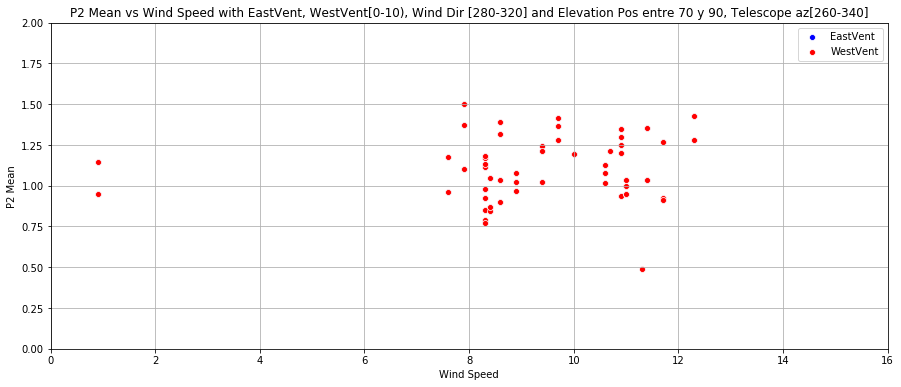

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 0) & (df['eastVent'] < 10) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]

filtered_df_west = df[(df['westVent'] >= 0) & (df['westVent'] < 10) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean')
plt.title('P2 Mean vs Wind Speed with EastVent, WestVent[0-10), Wind Dir [280-320] and Elevation Pos entre 70 y 90, Telescope az[260-340]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

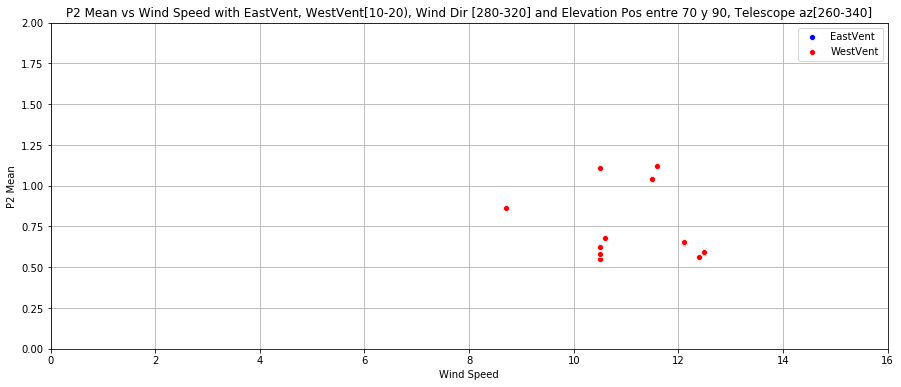

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 10) & (df['eastVent'] < 20) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]

filtered_df_west = df[(df['westVent'] >= 10) & (df['westVent'] < 20) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean')
plt.title('P2 Mean vs Wind Speed with EastVent, WestVent[10-20), Wind Dir [280-320] and Elevation Pos entre 70 y 90, Telescope az[260-340]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

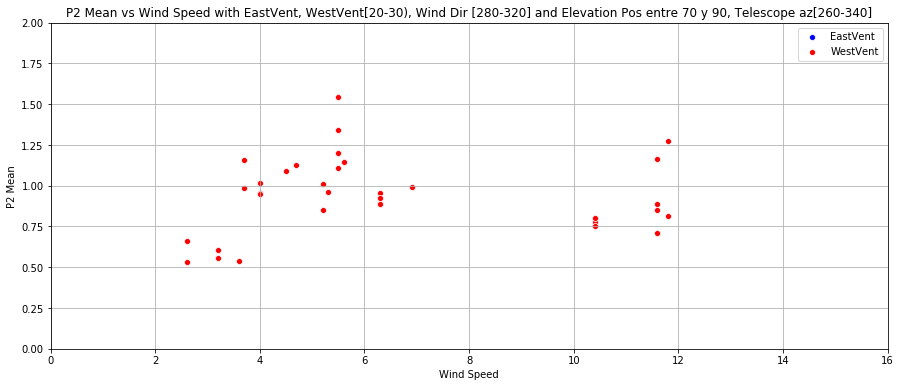

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 20) & (df['eastVent'] < 30) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]

filtered_df_west = df[(df['westVent'] >= 20) & (df['westVent'] < 30) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean')
plt.title('P2 Mean vs Wind Speed with EastVent, WestVent[20-30), Wind Dir [280-320] and Elevation Pos entre 70 y 90, Telescope az[260-340]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

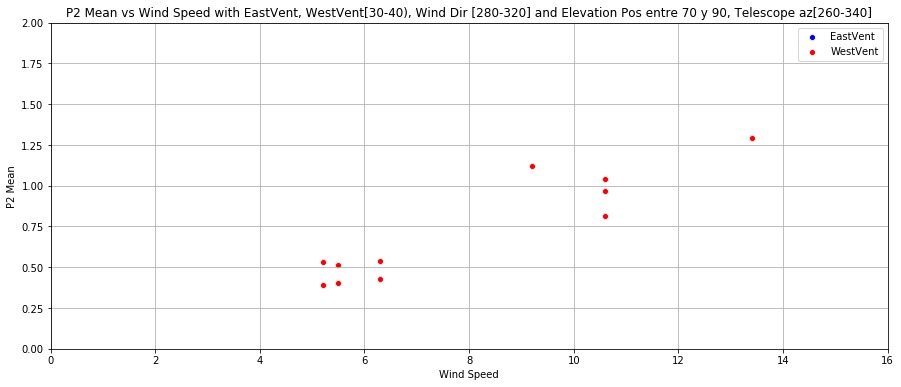

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 30) & (df['eastVent'] < 40) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]

filtered_df_west = df[(df['westVent'] >= 30) & (df['westVent'] < 40) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean')
plt.title('P2 Mean vs Wind Speed with EastVent, WestVent[30-40), Wind Dir [280-320] and Elevation Pos entre 70 y 90, Telescope az[260-340]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

No handles with labels found to put in legend.


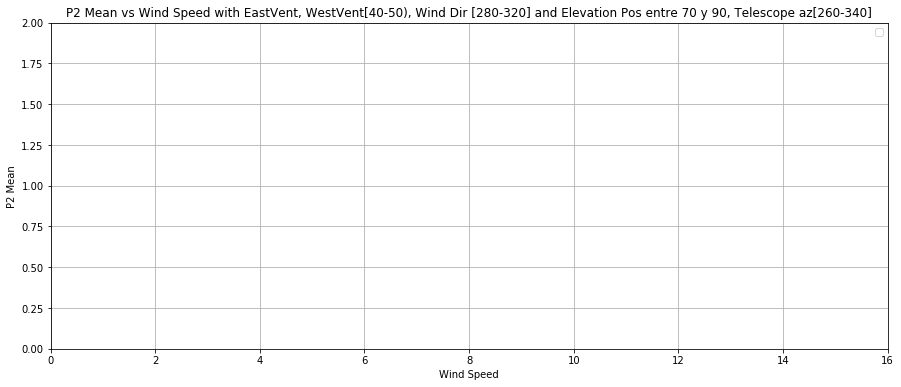

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 40) & (df['eastVent'] < 50) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]

filtered_df_west = df[(df['westVent'] >= 40) & (df['westVent'] < 50) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean')
plt.title('P2 Mean vs Wind Speed with EastVent, WestVent[40-50), Wind Dir [280-320] and Elevation Pos entre 70 y 90, Telescope az[260-340]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

No handles with labels found to put in legend.


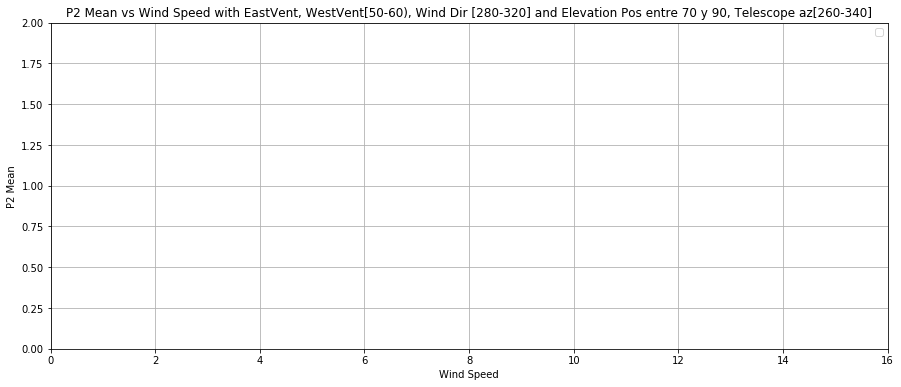

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 50) & (df['eastVent'] < 60) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]

filtered_df_west = df[(df['westVent'] >= 50) & (df['westVent'] < 60) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean')
plt.title('P2 Mean vs Wind Speed with EastVent, WestVent[50-60), Wind Dir [280-320] and Elevation Pos entre 70 y 90, Telescope az[260-340]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

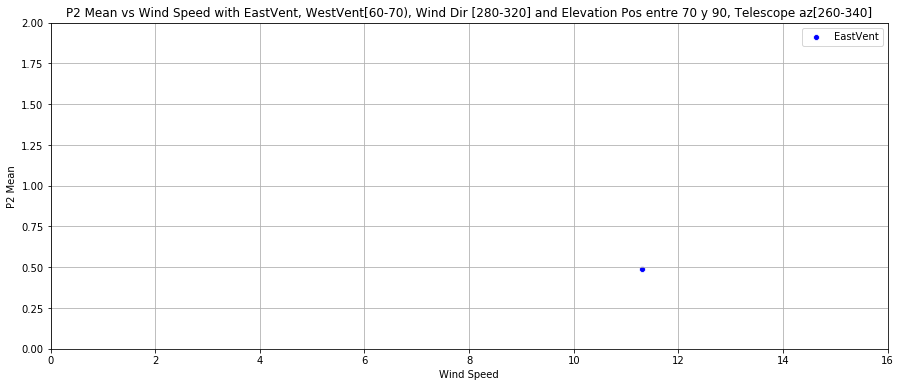

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 60) & (df['eastVent'] < 70) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]

filtered_df_west = df[(df['westVent'] >= 60) & (df['westVent'] < 70) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean')
plt.title('P2 Mean vs Wind Speed with EastVent, WestVent[60-70), Wind Dir [280-320] and Elevation Pos entre 70 y 90, Telescope az[260-340]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

No handles with labels found to put in legend.


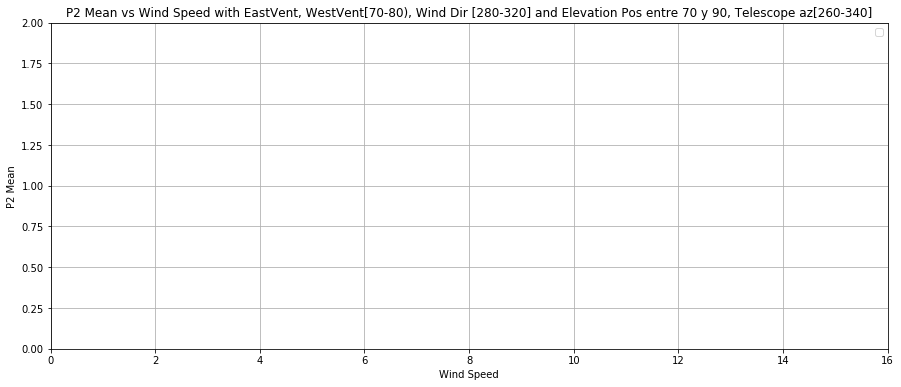

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 70) & (df['eastVent'] < 80) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]

filtered_df_west = df[(df['westVent'] >= 70) & (df['westVent'] < 80) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean')
plt.title('P2 Mean vs Wind Speed with EastVent, WestVent[70-80), Wind Dir [280-320] and Elevation Pos entre 70 y 90, Telescope az[260-340]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

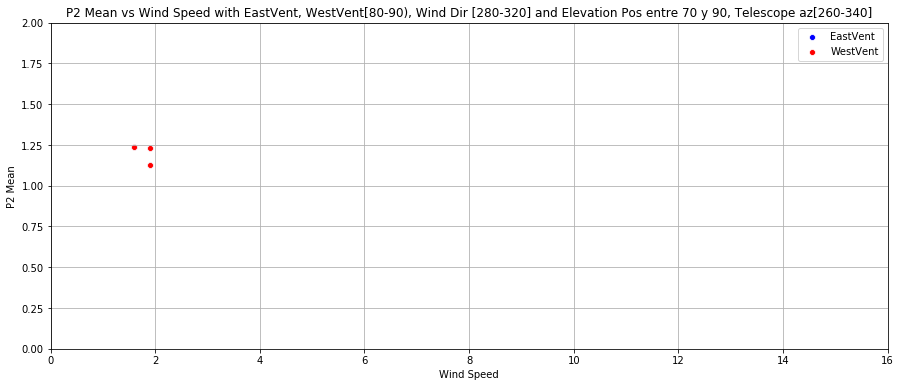

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 80) & (df['eastVent'] < 90) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]

filtered_df_west = df[(df['westVent'] >= 80) & (df['westVent'] < 90) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean')
plt.title('P2 Mean vs Wind Speed with EastVent, WestVent[80-90), Wind Dir [280-320] and Elevation Pos entre 70 y 90, Telescope az[260-340]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

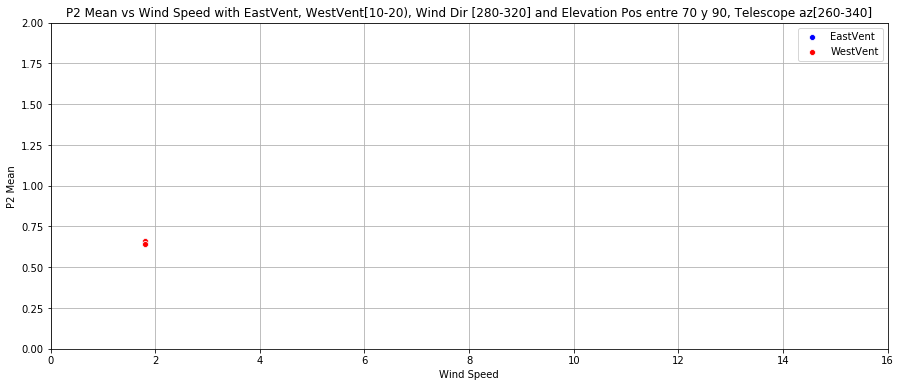

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = 'p2mean_az_el_wind20.csv'  # Asegúrate de que esta sea la ruta correcta de tu archivo
df = pd.read_csv(file_path)

# Filtrar los datos según los rangos de 'eastVent', 'westVent' y 'mcs_el_pos'
filtered_df_east = df[(df['eastVent'] >= 90) & (df['eastVent'] < 100) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]

filtered_df_west = df[(df['westVent'] >= 90) & (df['westVent'] < 100) &
                      (df['mcs_el_pos'] >= 70) & (df['mcs_el_pos'] <= 90) &
                      (df['windDir'] >= 280) & (df['windDir'] <=320) &
                      (df['ecs_az'] >=260) & (df['ecs_az'] <=340)]
 
# Crear el gráfico con Seaborn
plt.figure(figsize=(15, 6))

# Graficar los puntos para 'eastVent' en azul
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_east, color='blue', label='EastVent')

# Graficar los puntos para 'westVent' en rojo
sns.scatterplot(x='windSpeed', y='p2_mean', data=filtered_df_west, color='red', label='WestVent')

# Fijar los límites de los ejes X e Y
plt.xlim(0, 16)  # Ajusta los valores según tus necesidades
plt.ylim(0, 2)   # Ajusta los valores según tus necesidades

# Etiquetas y título del gráfico
plt.xlabel('Wind Speed')
plt.ylabel('P2 Mean')
plt.title('P2 Mean vs Wind Speed with EastVent, WestVent[10-20), Wind Dir [280-320] and Elevation Pos entre 70 y 90, Telescope az[260-340]')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()